In [71]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [72]:
pip install tensorflow


In [73]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [74]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [75]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
#divide dataset into independent and dependent features
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [78]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [122]:
data.size

140000

In [80]:
#Features Engineering
geo = pd.get_dummies(X['Geography'],drop_first=True) #used for cateforical classes
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [81]:
#concatenate with the dataframe
X = X.drop(['Geography','Gender'],axis=1)


In [82]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [83]:
X = pd.concat([X,geo,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [84]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
#for features based, distance based, gradient descent we need features scaling
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
X_train.shape

(8000, 11)

In [87]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [88]:
#Part 2 (creating ANN)
from tensorflow.keras.models import Sequential # whole NN for FP and BP
from tensorflow.keras.layers import Dense #creating neorons
from tensorflow.keras.layers import Dropout #Reduce Overfitting
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU #Activation functions

In [89]:
classifier = Sequential()

In [107]:
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,activation='sigmoid'))
#

In [108]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [109]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [93]:

# opt = tensorflow.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
#     name='Adam',
# )

In [110]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [111]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8015 - loss: 0.4782 - val_accuracy: 0.8440 - val_loss: 0.3898
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3887 - val_accuracy: 0.8402 - val_loss: 0.3821
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8477 - loss: 0.3770 - val_accuracy: 0.8519 - val_loss: 0.3689
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8412 - loss: 0.3771 - val_accuracy: 0.8217 - val_loss: 0.3807
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8517 - loss: 0.3579 - val_accuracy: 0.8527 - val_loss: 0.3748
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8518 - loss: 0.3523 - val_accuracy: 0.8501 - val_loss: 0.3837
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8433 - loss: 0.3717 - val_accuracy: 0.8478 - val_loss: 0.3717
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8582 - loss: 0.3512 - 

In [112]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

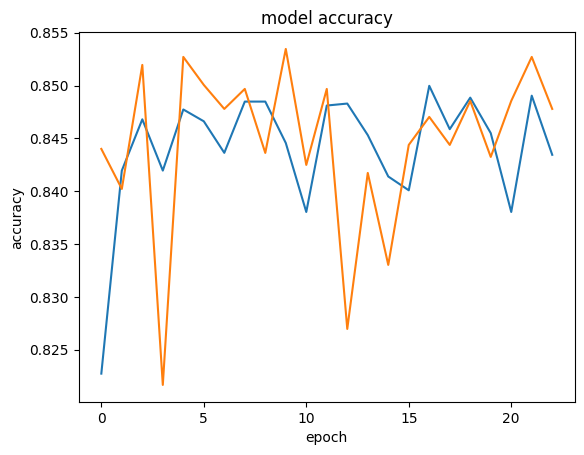

In [113]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

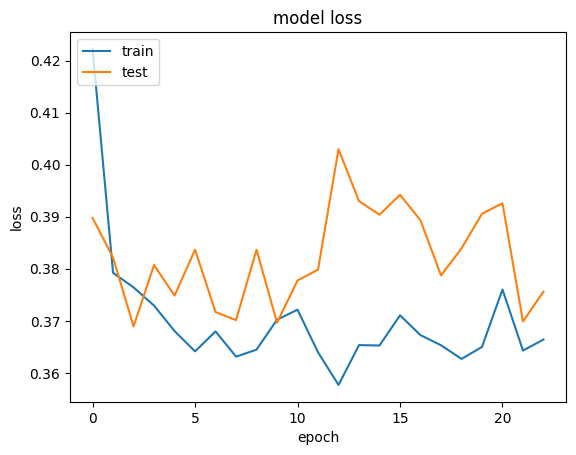

In [114]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [115]:
# Part 3 - making predictions and evaluating the models

#Predictiong the TEst set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1520,   87],
       [ 203,  190]])

In [117]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.855

In [106]:
#get the weights
classifier.get_weights()

[array([[ 0.07733826,  0.06340632, -0.98807645,  0.27444562,  0.09712217,
          0.98687834, -0.12260828,  0.38071895, -0.28686717,  0.7700489 ,
          1.1884266 ],
        [ 0.60125804, -0.65734106, -0.5878676 ,  2.9411418 ,  1.1535213 ,
         -2.2657423 , -2.9967108 , -3.2949479 , -1.069614  ,  2.341323  ,
         -2.6955388 ],
        [-0.0058887 , -0.22969118, -0.143225  ,  0.36235926, -1.3012928 ,
          0.92391664,  0.3895085 ,  0.13820219, -1.1391609 ,  0.541022  ,
          1.3932583 ],
        [ 0.97693515, -4.1983404 ,  1.570784  , -1.8646606 , -0.97775626,
          0.998666  , -0.02843393, -0.5307236 ,  0.6237804 ,  0.62562984,
          0.31178683],
        [ 4.057806  ,  0.8244358 ,  0.67013633, -2.347916  ,  1.8296618 ,
         -1.9088156 ,  0.72572386, -1.579148  ,  0.9968054 ,  0.600183  ,
          0.17873037],
        [-0.48025432, -0.17828447, -0.5315969 , -0.25460583, -1.168314  ,
         -0.7802352 , -1.2914407 ,  1.1034226 ,  2.2012863 ,  0.4493203